In [1]:
library(ggplot2)
library(dplyr)
library(ggbeeswarm)
library(cowplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
### consider eQTL whose beta_GxC flips sign for more than 15% of (pseudo)cells

In [3]:
beta_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/"

In [4]:
# list.files(beta_dir)
beta_GxE_est_file = paste0(beta_dir,"eqtl_est_single_GxE_genetic_effects.csv")
beta_GxE_est = read.csv(beta_GxE_est_file, row.names=1)
head(beta_GxE_est)

,beta,eqtl
0,0.7559366,ABHD10_-3_111697439_T_G
1,0.3794608,ABHD12B_-14_51328222_C_T
2,0.2242704,ACKR2_-3_42817129_C_T
3,0.2317751,ADD2_-2_70894426_A_T
4,0.4976565,ADSL_-22_40757228_A_C
5,0.1462157,AIM1L_-1_26673825_C_T


In [5]:
flips_filename = paste0(beta_dir, "eqtl_with_flip_sign.csv")
flips_df = read.csv(flips_filename, row.names = 1)
head(flips_df,2)

,beta_G,n
ABHD12B-14_51328222_C_T,-0.10783378,0.2393439
ADSL-22_40757228_A_C,0.09485572,0.6827107


In [8]:
nrow(flips_df)
flips_df$n2 = flips_df$n
flips_df[flips_df$n2>0.5,"n2"] = 1-flips_df[flips_df$n2>0.5,"n"]
flips_df = flips_df[flips_df$n2>0.25,]
nrow(flips_df)

[1] 94

[1] 45

In [9]:
## load single-cell eQTL genetic effects due to GxC (beta_GxC)
df = read.csv(paste0(beta_dir,"eqtl_tot_genetic_effect_all.txt"), sep="\t",row.names = 1)
colnames(df) = gsub("_-","-",gsub("\\.","-",colnames(df)))
head(df,2)
nrow(df)
ncol(df)

,ABHD10-3_111697439_T_G,ABHD12B-14_51328222_C_T,ACKR2-3_42817129_C_T,ADD2-2_70894426_A_T,ADSL-22_40757228_A_C,AIM1L-1_26673825_C_T,AKAP7-6_131691964_C_A,ALDH7A1-5_126011412_G_A,ANKRD18B-9_33524775_C_A,APIP-11_34905987_T_C,...,YWHAE-17_1246420_G_A,ZBBX-3_167080934_T_G,ZC3HAV1-7_138730361_T_C,ZFR2-19_3840157_C_T,ZG16B-16_2871121_T_C,ZNF423-16_49599995_C_G,ZNF552-19_58315273_G_A,ZNF738-19_21474173_G_A,ZNF77-19_2936535_G_A,ZP3-7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


[1] 8352

[1] 213

In [10]:
df1 = df[,colnames(df) %in% gsub("\\.","-",rownames(flips_df))]
eqtls = colnames(df1)
length(eqtls)
# eqtls

[1] 45

In [11]:
### load DA pseudocell object

In [52]:
# sce = readRDS("/hps/nobackup2/stegle/users/acuomo/neuoseq_DA_pseudocells_sce.rds")
sce

class: SingleCellExperiment 
dim: 32738 9219 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302.10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(9219): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [13]:
df0 = counts(sce)
nrow(df0)
ncol(df0)

[1] 32738

[1] 9219

In [14]:
rownames(df0) = gsub("\\.","-",rownames(df0))
df0[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302-10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11-34P13-7,0,0,0,0,0
RP11-34P13-8,0,0,0,0,0


In [15]:
df_eqtl = flips_df
df_eqtl$gene = gsub("\\.","-",gsub("-.*","",gsub("-AS1","\\.AS1",gsub("HLA-","HLA\\.",rownames(flips_df)))))
df_eqtl$snp_id = gsub(".*-","",rownames(flips_df))
tail(df_eqtl)

,beta_G,n,n2,gene,snp_id
VWC2-7_49627185_G_T,0.05306932,0.6834291,0.3165709,VWC2,7_49627185_G_T
ZBBX-3_167080934_T_G,-0.15672368,0.2745450,0.2745450,ZBBX,3_167080934_T_G
ZG16B-16_2871121_T_C,0.08274510,0.6752874,0.3247126,ZG16B,16_2871121_T_C
ZNF423-16_49599995_C_G,0.07116250,0.6495450,0.3504550,ZNF423,16_49599995_C_G
ZNF738-19_21474173_G_A,0.07284744,0.5563937,0.4436063,ZNF738,19_21474173_G_A
ZNF77-19_2936535_G_A,0.16858047,0.6709770,0.3290230,ZNF77,19_2936535_G_A


In [16]:
#### load genotypes

In [17]:
flip_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/flip_signs/"

In [18]:
mydir = paste0(flip_folder, "genotypes/")
myfiles = list.files(mydir)

In [19]:
skip_eqtls = c("AKAP7-6_131691964_C_A", "C19orf10-19_4664038_T_C", "CBWD2-2_114235568_A_C", "CD36-7_80240689_T_C",
              "CEACAM21-19_42092815_T_A", "CHEK1-11_125468231_T_C", "CNOT6L-4_78754433_T_C", "DHRS4L2-14_24405051_G_A",
              "DNPH1-6_43122062_C_A", "EPCAM-2_47590762_C_T", "FAM153B-5_175511318_C_T", "FBP1-9_97408971_A_G",
              "GM2A-5_150653612_C_G", "KIF6-6_39584856_T_C", "PRPH-12_49685089_T_C", "RASSF4-10_45478876_T_C",
              "RBM26-AS1-13_79980340_C_T", "REEP3-10_65347105_G_A", "SLC44A2-19_10813795_A_G", "SYCE3-22_51001271_G_A",
              "TRAF3IP2-AS1-6_111941286_G_A", "TRIT1-1_40342232_A_C", "TUBB4B-9_140276433_G_A", "UTS2-1_7929819_T_C",
              "ZBBX-3_167080934_T_G", "ZNF77-19_2936535_G_A")

In [28]:
summary_df = data.frame(eqtl = eqtls[!(eqtls %in% skip_eqtls)], beta_top=0, beta_bottom=0, 
                        beta_se_top=0, beta_se_bottom=0, pv_top=1, pv_bottom=1)

In [29]:
for (eqtl in eqtls){
#     print(eqtl)
    if (eqtl %in% skip_eqtls){next}
    snp = df_eqtl[rownames(df_eqtl) == eqtl,"snp_id"]
    gene = df_eqtl[rownames(df_eqtl) == eqtl,"gene"]
    # top pseudocells
    top_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_top20quantile_pseudocells.csv"),list.files(flip_folder))])
    top=read.csv(top_file, row.names=1)
    top_pseudocells = as.character(top[,1])
    # bottom pseudocells
    bottom_file = paste0(flip_folder,list.files(flip_folder)[grep(paste0(eqtl,"_bottom20quantile_pseudocells.csv"),list.files(flip_folder))])
    bottom=read.csv(bottom_file, row.names=1)
    bottom_pseudocells = as.character(bottom[,1])
    # genotypes
    filename = paste0(mydir, myfiles[grep(gene, myfiles)])
    df_g = read.csv(filename)
    colnames(df_g)[1] = "donor"  
    # expression (phenotype)
    df_e = data.frame(pseudocell = colnames(df0), Expression = df0[gene,])
    df_e$donor = gsub("--.*","",df_e$pseudocell)
    # merge
    df_ge = inner_join(df_e, df_g, by="donor")
    # top
    df1 = df_ge[df_ge$pseudocell %in% top_pseudocells,]
    lm = lm(Expression ~ Genotype, data = df1)
    beta1 = coef(lm)[2]
    beta_se1 = summary(lm)$coefficients[2,2] 
    pv1 = summary(lm)$coefficients[2,4] 
    # bottom
    df2 = df_ge[df_ge$pseudocell %in% bottom_pseudocells,]
    lm = lm(Expression ~ Genotype, data = df2)
    beta_se2 = summary(lm)$coefficients[2,2]
    beta2 = coef(lm)[2]
    pv2 = summary(lm)$coefficients[2,4] 
    summary_df[summary_df$eqtl == eqtl, "beta_top"] = beta1
    summary_df[summary_df$eqtl == eqtl, "beta_bottom"] = beta2
    summary_df[summary_df$eqtl == eqtl, "beta_se_top"] = beta_se1
    summary_df[summary_df$eqtl == eqtl, "beta_se_bottom"] = beta_se2
    summary_df[summary_df$eqtl == eqtl, "pv_top"] = pv1
    summary_df[summary_df$eqtl == eqtl, "pv_bottom"] = pv2
}

In [30]:
head(summary_df)

eqtl,beta_top,beta_bottom,beta_se_top,beta_se_bottom,pv_top,pv_bottom
ADSL-22_40757228_A_C,0.4566455,-0.069643491,0.08163057,0.08760267,2.587780e-08,0.42673076
AIM1L-1_26673825_C_T,0.1385908,0.058506328,0.02194199,0.02193155,3.428819e-10,0.00771161
ALDH7A1-5_126011412_G_A,0.5447187,0.073115451,0.08155943,0.08462475,3.271249e-11,0.38771421
BATF3-1_212852832_T_C,0.1352372,-0.001157855,0.02312108,0.01136633,5.935374e-09,0.91887438
C11orf24-11_68006555_G_A,0.2490406,-0.021723331,0.03825396,0.03137609,9.901080e-11,0.48881192
CDC42SE2-5_130921388_G_A,0.5181776,0.065775094,0.08074908,0.08205413,1.804524e-10,0.42289496


In [31]:
nrow(summary_df)
# opposite effects
nrow(summary_df[summary_df$beta_top*summary_df$beta_bottom<0,])
nrow(summary_df[summary_df$beta_top*summary_df$beta_bottom<0,])/nrow(summary_df)

[1] 29

[1] 21

[1] 0.7241379

In [32]:
# summary_df = df0

In [33]:
summary_df$replicates = "no"
summary_df[summary_df$beta_top*summary_df$beta_bottom<0,"replicates"] = "yes"

In [34]:
summary_df$replicates_sign = "no"
summary_df[summary_df$beta_top*summary_df$beta_bottom<0 & summary_df$pv_top<0.05 & summary_df$pv_bottom<0.05,"replicates_sign"] = "yes"

In [37]:
head(summary_df)

eqtl,beta_top,beta_bottom,beta_se_top,beta_se_bottom,pv_top,pv_bottom,replicates,replicates_sign
ADSL-22_40757228_A_C,0.4566455,-0.069643491,0.08163057,0.08760267,2.587780e-08,0.42673076,yes,no
AIM1L-1_26673825_C_T,0.1385908,0.058506328,0.02194199,0.02193155,3.428819e-10,0.00771161,no,no
ALDH7A1-5_126011412_G_A,0.5447187,0.073115451,0.08155943,0.08462475,3.271249e-11,0.38771421,no,no
BATF3-1_212852832_T_C,0.1352372,-0.001157855,0.02312108,0.01136633,5.935374e-09,0.91887438,yes,no
C11orf24-11_68006555_G_A,0.2490406,-0.021723331,0.03825396,0.03137609,9.901080e-11,0.48881192,yes,no
CDC42SE2-5_130921388_G_A,0.5181776,0.065775094,0.08074908,0.08205413,1.804524e-10,0.42289496,no,no


In [35]:
flips_filename = paste0(beta_dir, "eqtl_with_flip_sign.csv")
flips_df = read.csv(flips_filename)
colnames(flips_df)[1] = "eqtl"
head(flips_df)

eqtl,beta_G,n
ABHD12B-14_51328222_C_T,-0.10783378,0.2393439
ADSL-22_40757228_A_C,0.09485572,0.6827107
AIM1L-1_26673825_C_T,0.04175069,0.7204262
AKAP7-6_131691964_C_A,0.17694359,0.7383860
ALDH7A1-5_126011412_G_A,0.13257557,0.7406609
ANKRD18B-9_33524775_C_A,0.07399059,0.8421935


In [53]:
flips_df$n2 = flips_df$n
flips_df[flips_df$n2>0.5,"n2"] = 1-flips_df[flips_df$n2>0.5,"n"]
flips_df = flips_df[flips_df$n2>0.25,]

In [54]:
df0 = inner_join(flips_df, summary_df, by=c("eqtl"))

In [55]:
head(df0)

eqtl,beta_G,n,n2,beta_top,beta_bottom,beta_se_top,beta_se_bottom,pv_top,pv_bottom,replicates,replicates_sign
ADSL-22_40757228_A_C,0.09485572,0.6827107,0.3172893,0.4566455,-0.069643491,0.08163057,0.08760267,2.587780e-08,0.42673076,yes,no
AIM1L-1_26673825_C_T,0.04175069,0.7204262,0.2795738,0.1385908,0.058506328,0.02194199,0.02193155,3.428819e-10,0.00771161,no,no
ALDH7A1-5_126011412_G_A,0.13257557,0.7406609,0.2593391,0.5447187,0.073115451,0.08155943,0.08462475,3.271249e-11,0.38771421,no,no
BATF3-1_212852832_T_C,0.06635896,0.5977011,0.4022989,0.1352372,-0.001157855,0.02312108,0.01136633,5.935374e-09,0.91887438,yes,no
C11orf24-11_68006555_G_A,0.08070138,0.7127634,0.2872366,0.2490406,-0.021723331,0.03825396,0.03137609,9.901080e-11,0.48881192,yes,no
CDC42SE2-5_130921388_G_A,0.14244704,0.6955220,0.3044780,0.5181776,0.065775094,0.08074908,0.08205413,1.804524e-10,0.42289496,no,no


In [56]:
# write.csv(df0, paste0(beta_dir,"eqtl_with_flip_sign_replication.csv"))
# df0 = read.csv(paste0(beta_dir,"eqtl_with_flip_sign_replication.csv"), row.names=1)

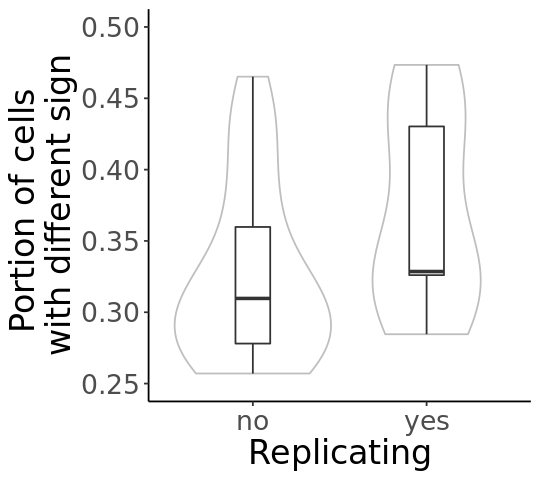

In [60]:
options(repr.plot.width = 4.5, repr.plot.height = 4)
p = ggplot(df0, aes(x=as.factor(replicates_sign), y=n2)) + theme_classic() + geom_violin(col="grey") + geom_boxplot(width=0.2) 
p = p + ylim(c(0.25,0.5)) + ylab("Portion of cells \nwith different sign") + xlab("Replicating")
p + theme(text = element_text(size=20))

In [61]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF11C_n.pdf"), width=4.5, height=4)
p + theme(text = element_text(size=20))
dev.off()

png 
  2

In [62]:
beta_GxE_est$eqtl = gsub("_-","-",beta_GxE_est$eqtl)
head(beta_GxE_est)

,beta,eqtl
0,0.7559366,ABHD10-3_111697439_T_G
1,0.3794608,ABHD12B-14_51328222_C_T
2,0.2242704,ACKR2-3_42817129_C_T
3,0.2317751,ADD2-2_70894426_A_T
4,0.4976565,ADSL-22_40757228_A_C
5,0.1462157,AIM1L-1_26673825_C_T


In [63]:
df0 = summary_df
df1 = inner_join(df0,beta_GxE_est,by="eqtl")
head(df1)

eqtl,beta_top,beta_bottom,beta_se_top,beta_se_bottom,pv_top,pv_bottom,replicates,replicates_sign,beta
ADSL-22_40757228_A_C,0.4566455,-0.069643491,0.08163057,0.08760267,2.587780e-08,0.42673076,yes,no,0.4976565
AIM1L-1_26673825_C_T,0.1385908,0.058506328,0.02194199,0.02193155,3.428819e-10,0.00771161,no,no,0.1462157
ALDH7A1-5_126011412_G_A,0.5447187,0.073115451,0.08155943,0.08462475,3.271249e-11,0.38771421,no,no,0.5417320
BATF3-1_212852832_T_C,0.1352372,-0.001157855,0.02312108,0.01136633,5.935374e-09,0.91887438,yes,no,0.5155175
C11orf24-11_68006555_G_A,0.2490406,-0.021723331,0.03825396,0.03137609,9.901080e-11,0.48881192,yes,no,0.3127928
CDC42SE2-5_130921388_G_A,0.5181776,0.065775094,0.08074908,0.08205413,1.804524e-10,0.42289496,no,no,0.6633811


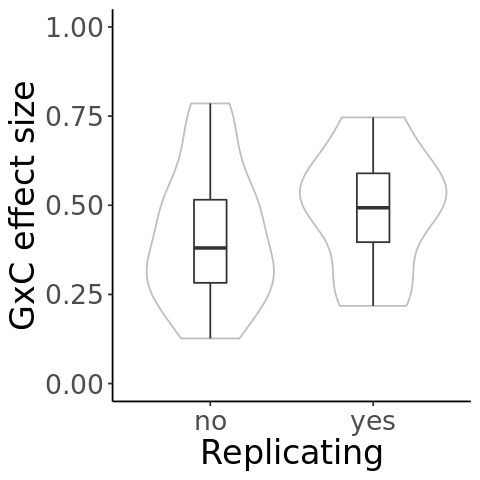

In [65]:
options(repr.plot.width = 4, repr.plot.height = 4)
p = ggplot(df1, aes(x=as.factor(replicates_sign), y=beta)) + theme_classic() + geom_violin(col="grey") + geom_boxplot(width=0.2) 
p = p + ylim(c(0,1)) + ylab("GxC effect size") + xlab("Replicating")
p + theme(text = element_text(size=20))

In [66]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF11C_beta.pdf"), width=4, height=4)
p + theme(text = element_text(size=20))
dev.off()

png 
  2